In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the datasset
data=pd.read_csv("D:/Flip Robo Technologies/Spamdetection/spam.csv")

In [3]:
#Reading data
data

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [4]:
#Shape
print("Shape-->",data.shape)

Shape--> (2893, 3)


So we have 2893 rows and 2 columns

In [5]:
print("Ham and spam counts\n",data.label.value_counts())

Ham and spam counts
 0    2412
1     481
Name: label, dtype: int64


So 2412 spam and 481 ham.

In [6]:
#Ratio
print('spam ratio = ',round(len(data[data['label']==0])/len(data.label),2)*100,'%')
print('ham ratio = ',round(len(data[data['label']==1])/len(data.label),2)*100,'%')

spam ratio =  83.0 %
ham ratio =  17.0 %


In [7]:
data["sublength"]=data.subject.str.len()
data["messagelength"]=data.message.str.len()

In [8]:
data

,subject,message,label,sublength,messagelength
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,28.0,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,34.0,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,34.0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,54.0,2949


In [9]:
#Converting subject and messageto lower
data['subject']=data['subject'].str.lower()
data['message']=data['message'].str.lower()

In [10]:
data

,subject,message,label,sublength,messagelength
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,28.0,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,34.0,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,34.0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,54.0,2949


In [11]:
#Replacing emailaddresses with email
data["message"]=data["message"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email_address')

#Replacing webaddress
data["message"]=data["message"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replacing moneysymbols
data["message"]=data["message"].str.replace(r'£|/$','dollars')

#Replacing phonenumber,paranthesis,spaces,dashes,nospaces)
data['message']=data['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone number')

#Replacing phone number with phone
data['message']=data['message'].replace(r'\d+(\.\d+)?','number')

In [12]:
#Removing punctuation marks
data['message']=data['message'].str.replace(r'[^\w\d\s]',' ')

#Removing whitespaes between terms with a single space
data['message']=data['message'].str.replace(r'\s+',' ')

#Removing tailing and heading whitespaces
data['message']=data['message'].str.replace(r'^\s+|\s+?$',' ')


In [13]:
data

,subject,message,label,sublength,messagelength
0,job posting - apple-iss research center,content length 3386 apple iss research center ...,0,39.0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by we have taken man...,1,28.0,262
2889,you have been asked to join kiddin,the list owner of kiddin has invited you to jo...,1,34.0,2163
2890,anglicization of composers ' names,judging from the return post i must have sound...,0,34.0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha there are two separate fallacies in the...,0,54.0,2949


In [14]:
#Replacing emailaddresses with email
data["subject"]=data["subject"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email_address')

#Replacing webaddress
data["subject"]=data["subject"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replacing moneysymbols
data["subject"]=data["subject"].str.replace(r'£|/$','dollars')

#Replacing phonenumber,paranthesis,spaces,dashes,nospaces)
data['subject']=data['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone number')

#Replacing phone number with phone
data['subject']=data['subject'].replace(r'\d+(\.\d+)?','number')

In [15]:
#Removing punctuation marks
data['subject']=data['subject'].str.replace(r'[^\w\d\s]',' ')

#Removing whitespaes between terms with a single space
data['subject']=data['subject'].str.replace(r'\s+',' ')

#Removing tailing and heading whitespaces
data['subject']=data['subject'].str.replace(r'^\s+|\s+?$',' ')

In [16]:
from nltk.corpus import stopwords
import string
import nltk

stop_words=stopwords.words("english")

data['message']=data['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))


In [17]:
#New column after cleasing
data["clean_length_message"]=data.message.str.len()
data["clean_length_subject"]=data.subject.str.len()

In [18]:
#Total length removal
print("Original length of message",data.messagelength.sum())
print("After cleansing",data.clean_length_message.sum())

print("Original legth ofsubject",data.sublength.sum())
print("Aftre cleansing ",data.clean_length_subject.sum())

Original length of message 9070005
After cleansing 6308430
Original legth ofsubject 91647.0
Aftre cleansing  84741.0


In [19]:
data

,subject,message,label,sublength,messagelength,clean_length_message,clean_length_subject
0,job posting apple iss research center,content length 3386 apple iss research center ...,0,39.0,2856,2138,37.0
1,NaN,lang classification grimes joseph e barbara f ...,0,NaN,1800,1376,NaN
2,query letter frequencies for text identification,posting inquiry sergei atamas satamas umabnet ...,0,50.0,1435,1024,48.0
3,risk,colleague researching differing degrees risk p...,0,4.0,324,210,4.0
4,request book information,earlier morning phone friend mine living south...,0,24.0,1046,629,24.0
...,...,...,...,...,...,...,...
2888,love your profile ysuolvpv,hello thanks stopping taken many new pics made...,1,28.0,262,132,26.0
2889,you have been asked to join kiddin,list owner kiddin invited join mailing list li...,1,34.0,2163,1214,34.0
2890,anglicization of composers names,judging return post must sounded like kind sel...,0,34.0,1039,643,32.0
2891,re 6 797 comparative method n ary comparison,gotcha two separate fallacies argument n ary c...,0,54.0,2949,1758,44.0


# Loud words in spam message

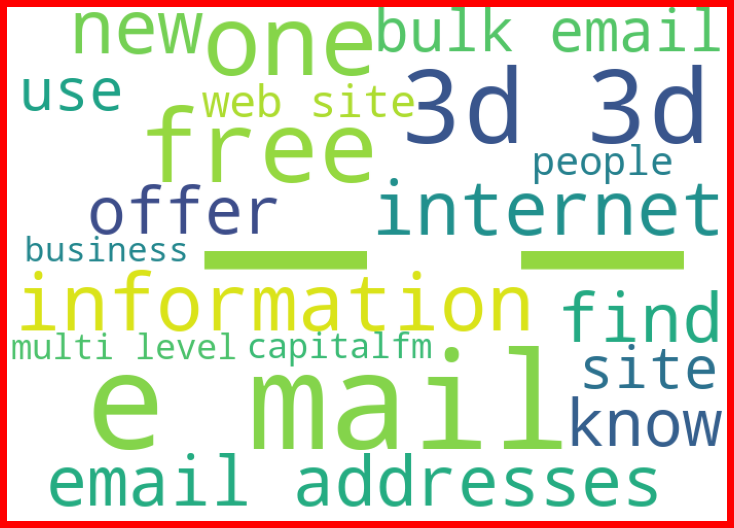

In [21]:
import wordcloud
from wordcloud import WordCloud
spam_message=data["message"][data["label"]==1]
spam_message_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(spam_message))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_message_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Loudwords in ham message

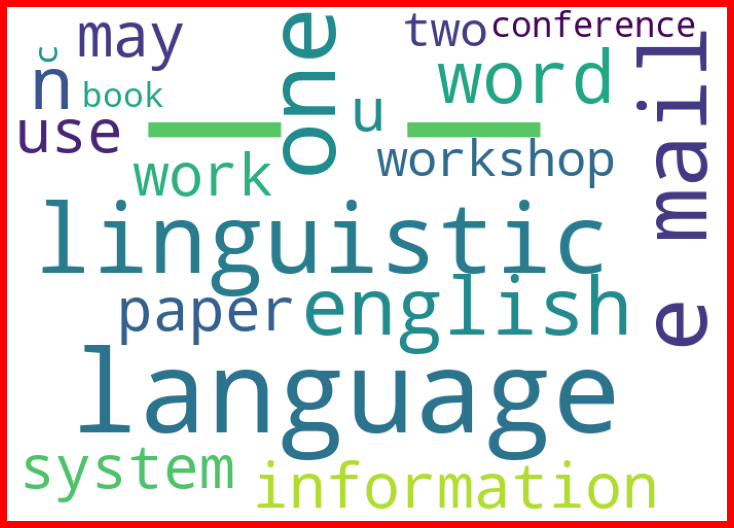

In [22]:
ham_message=data["message"][data["label"]==0]
ham_message_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(ham_message))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_message_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(data["message"],data["subject"])

In [25]:
X=features
y=data["label"]

In [26]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=42)

# Naive Bayes

In [27]:
naive.fit(X_train,Y_train)
y_pred=naive.predict(x_test)
print("Finle score -->",accuracy_score(y_test,y_pred))

Finle score --> 0.835635359116022


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.25       139

    accuracy                           0.84       724
   macro avg       0.92      0.57      0.58       724
weighted avg       0.86      0.84      0.78       724



In [30]:
confusion_matrix(y_test,y_pred)

array([[585,   0],
       [119,  20]], dtype=int64)

In [31]:
naive.fit(X_train,Y_train)
y_pred=naive.predict(x_test)
print("Finle score -->",accuracy_score(y_test,y_pred))

Finle score --> 0.835635359116022


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.25       139

    accuracy                           0.84       724
   macro avg       0.92      0.57      0.58       724
weighted avg       0.86      0.84      0.78       724



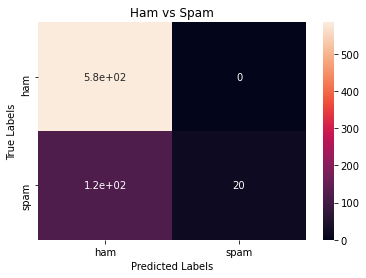

In [33]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title("Ham vs Spam")
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [34]:
confusion_matrix(y_test,y_pred)

array([[585,   0],
       [119,  20]], dtype=int64)

# SVM

In [35]:
from sklearn import svm

In [37]:
svm=svm.SVC()
svm.fit(X_train,Y_train)
y_pred=svm.predict(x_test)
print("Finle score -->",accuracy_score(y_test,y_pred))

Finle score --> 0.9737569060773481


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       585
           1       1.00      0.86      0.93       139

    accuracy                           0.97       724
   macro avg       0.98      0.93      0.96       724
weighted avg       0.97      0.97      0.97       724



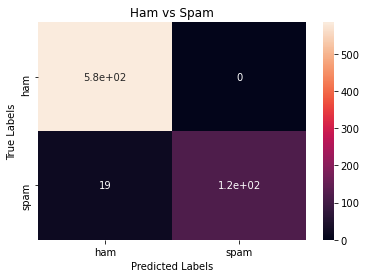

In [39]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title("Ham vs Spam")
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [40]:
confusion_matrix(y_test,y_pred)

array([[585,   0],
       [ 19, 120]], dtype=int64)

# End of Document